In [1]:
# From https://www.firedrakeproject.org/demos/helmholtz.py.html
from firedrake import *
mesh = UnitSquareMesh(10, 10)

firedrake:WARNING OMP_NUM_THREADS is not set or is set to a value greater than 1, we suggest setting OMP_NUM_THREADS=1 to improve performance


In [2]:
V = FunctionSpace(mesh, "CG", 1)

In [3]:
u = TrialFunction(V)
v = TestFunction(V)

In [4]:
f = Function(V)
x, y = SpatialCoordinate(mesh)
f.interpolate((1+8*pi*pi)*cos(x*pi*2)*cos(y*pi*2))

Coefficient(WithGeometry(FunctionSpace(<firedrake.mesh.MeshTopology object at 0x7f832ccdbe00>, FiniteElement('Lagrange', triangle, 1), name=None), Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0)), 2)

In [5]:
a = (inner(grad(u), grad(v)) + inner(u, v)) * dx
L = inner(f, v) * dx

In [6]:
u = Function(V)

In [7]:
solve(a == L, u, solver_parameters={'ksp_type': 'cg', 'pc_type': 'none'})

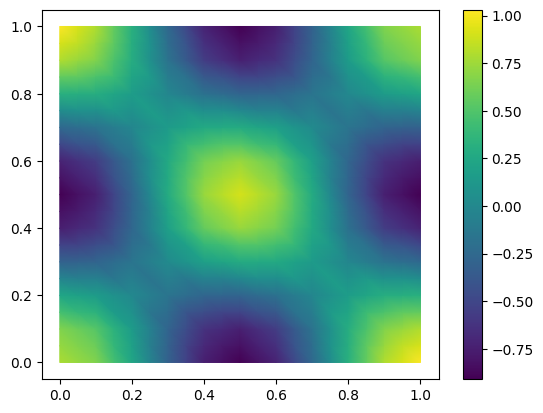

In [9]:
try:
  import matplotlib.pyplot as plt
except:
  warning("Matplotlib not imported")

try:
  from firedrake.pyplot import tripcolor, tricontour
  fig, axes = plt.subplots()
  colors = tripcolor(u, axes=axes)
  fig.colorbar(colors)
except Exception as e:
  warning("Cannot plot figure. Error msg: '%s'" % e)